# ITI104 - Machine Learning Algorithms
# Assignment 1 - Voting and Stacking Ensembles
# Extra : Breast cancer dataset - Binary classification
# Does not include written commentary of results

# METHOD 1: NO GRIDSEARCH ON BASE CLASSIFIERS 

In [141]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

In [142]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [143]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [144]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [145]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [146]:
df.target.value_counts(normalize=True)

1    0.627417
0    0.372583
Name: target, dtype: float64

# Stratified split

In [147]:
feature_cols = [x for x in df.columns if x != 'target']

# Create the generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(df[feature_cols], df['target']))

# Create the training and test sets
x_train = df.loc[train_idx, feature_cols]
y_train = df.loc[train_idx, 'target']

x_test = df.loc[test_idx, feature_cols]
y_test = df.loc[test_idx, 'target']

In [148]:
y_train.value_counts()
y_train.value_counts(normalize=True)

1    0.626374
0    0.373626
Name: target, dtype: float64

In [149]:
y_test.value_counts()
y_test.value_counts(normalize=True)

1    0.631579
0    0.368421
Name: target, dtype: float64

# Useful functions

In [150]:
cols_to_scale = data.feature_names

In [151]:
predict_summary_df = pd.DataFrame(dtype='float')

In [152]:
#FOR STANDARD

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

def full_results(name, classifier):
    y_train_pred = classifier.predict(x_train)
    y_test_pred = classifier.predict(x_test)
    
    global predict_summary_df

    #Type of classifier
    print(classifier)
    print()
    
    #APPEND RESULTS FOR COMPARISON OF MODELS
    #APPEND1
    score_summary.append(measure_error(y_test, y_test_pred, name))
    
    #APPEND2
    try:
        y_probs = classifier.predict_proba(x_test)
        df1 = pd.DataFrame(np.round(y_probs,4), columns = ['Prob(y=0)', 'Prob(y=1)'])
        df2 = pd.DataFrame(y_test_pred, columns = ['Predict'])
        df3 = pd.concat([df1, df2], axis=1)
        header = [name]*3
        df3.columns = pd.MultiIndex.from_tuples(list(zip(header, df3.columns)))
        global predict_summary_df
        predict_summary_df = pd.concat([predict_summary_df, df3], axis = 1)
        
    except:
        df2 = pd.DataFrame(y_test_pred, columns = ['Predict'])
        header = [name]
        df2.columns = pd.MultiIndex.from_tuples(list(zip(header, df2.columns)))
        predict_summary_df = pd.concat([predict_summary_df, df2], axis = 1)
        
    #Train and test set error comparison
    train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                       measure_error(y_test, y_test_pred, 'test')],
                                       axis=1)
    print(train_test_full_error)
    print()

    #Classification Report
    print(classification_report(y_test, y_test_pred))
    print()

    #Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    sns.set_context('talk')
    ax = sns.heatmap(cm, annot=True, fmt='d')
    labels = ['False', 'True']
    ax.set_xticklabels(labels);
    ax.set_yticklabels(labels);
    ax.set_ylabel('Actual');
    ax.set_xlabel('Predicted');
    plt.show()
    
    #AUC
    try:
        y_probs = classifier.predict_proba(x_test)[:, 1] 
        print('AUC =', roc_auc_score(y_test, y_probs))
        fpr, tpr, threshold = roc_curve(y_test, y_probs)
        plt.plot(fpr,tpr,'o-')
        plt.xlabel('False Postive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()
    except:
        pass
    
    #Feature importance
    try:
        feature_imp = pd.Series(classifier._final_estimator.feature_importances_, index=data.feature_names).sort_values(ascending=False)
        fig = plt.figure()
        ax = feature_imp.plot(kind='bar')
        ax.set(ylabel='Relative Importance');
    except:
        pass
    
    #Trees
    try:
        print('The total number of trees are', len(classifier._final_estimator.estimators_))
        max = 0
        for tree_in_forest in classifier._final_estimator.estimators_:
            if max < 4:
                plot_tree(tree_in_forest, filled=True)
                plt.show()
                max += 1
    except:
        pass
    
    print('-'*90)
    print()
    print()

In [153]:
pipe_logisticregression = Pipeline([('scaler', MinMaxScaler()), ('logisticregression', LogisticRegression(max_iter=5000, random_state=100))])
pipe_svm = Pipeline([('scaler', MinMaxScaler()), ('svm', svm.SVC(probability=True,random_state=100))])
pipe_kneighbors = Pipeline([('scaler', MinMaxScaler()), ('kneighbors', KNeighborsClassifier())])
pipe_decisiontree = Pipeline([('scaler', MinMaxScaler()), ('decisiontree', DecisionTreeClassifier(class_weight='balanced',random_state=100))])
pipe_bagging = Pipeline([('scaler', MinMaxScaler()), ('bagging', BaggingClassifier(random_state=100))])
pipe_adaboost = Pipeline([('scaler', MinMaxScaler()), ('adaboost', AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, max_features=4,random_state=100)))])
pipe_gradientboosting = Pipeline([('scaler', MinMaxScaler()), ('gradientboosting', GradientBoostingClassifier(random_state=100))])
pipe_randomforest = Pipeline([('scaler', MinMaxScaler()), ('randomforest', RandomForestClassifier(random_state=100))])

estimators = [('logisticregression', pipe_logisticregression),
              ('svm', pipe_svm),
             ('kneighbors', pipe_kneighbors),
             ('decisiontree', pipe_decisiontree),
             ('bagging', pipe_bagging),
             ('adaboost', pipe_adaboost),
             ('gradientboosting', pipe_gradientboosting),
             ('randomforest', pipe_randomforest)]

logisticregression
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=5000, random_state=100))])

              train      test
accuracy   0.978022  0.956140
precision  0.969283  0.946667
recall     0.996491  0.986111
f1         0.982699  0.965986

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114




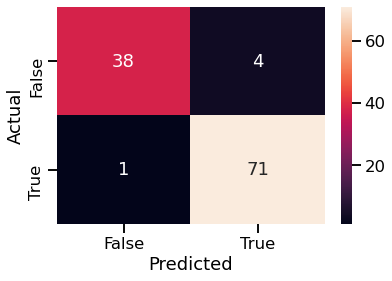

AUC = 0.9953703703703703


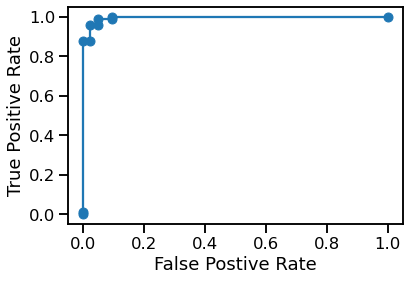

------------------------------------------------------------------------------------------


svm
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svm', SVC(probability=True, random_state=100))])

              train      test
accuracy   0.980220  0.982456
precision  0.975862  0.986111
recall     0.992982  0.986111
f1         0.984348  0.986111

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114




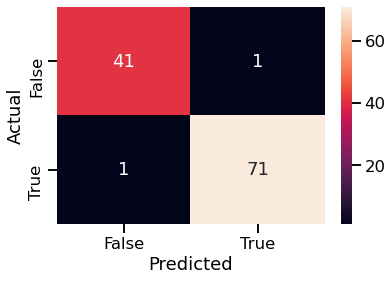

AUC = 0.9957010582010581


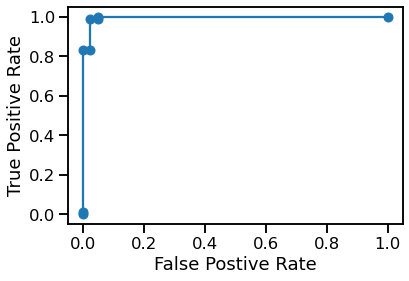

------------------------------------------------------------------------------------------


kneighbors
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('kneighbors', KNeighborsClassifier())])

              train      test
accuracy   0.978022  0.982456
precision  0.979094  0.972973
recall     0.985965  1.000000
f1         0.982517  0.986301

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114




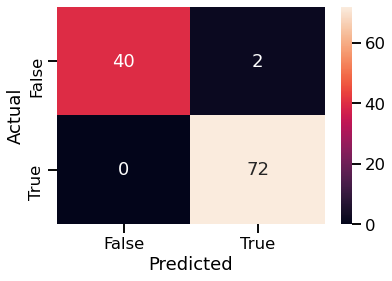

AUC = 0.9927248677248677


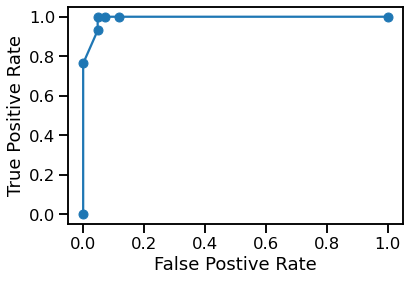

------------------------------------------------------------------------------------------


decisiontree
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('decisiontree',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=100))])

           train      test
accuracy     1.0  0.929825
precision    1.0  0.957143
recall       1.0  0.930556
f1           1.0  0.943662

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        42
           1       0.96      0.93      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114




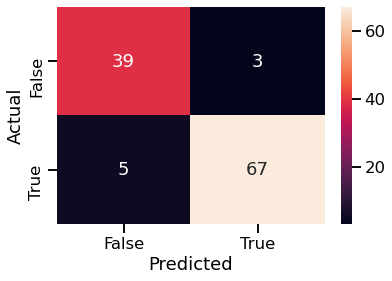

AUC = 0.9295634920634921


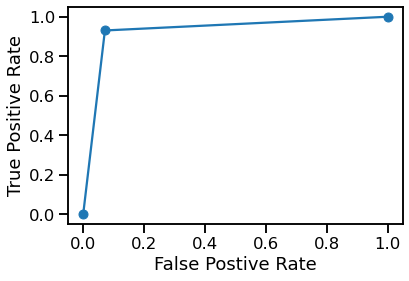

------------------------------------------------------------------------------------------


bagging
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('bagging', BaggingClassifier(random_state=100))])

              train      test
accuracy   0.997802  0.947368
precision  0.996503  0.985294
recall     1.000000  0.930556
f1         0.998249  0.957143

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        42
           1       0.99      0.93      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114




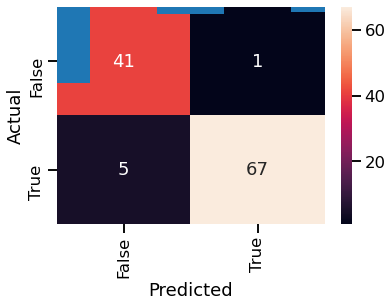

AUC = 0.9914021164021164


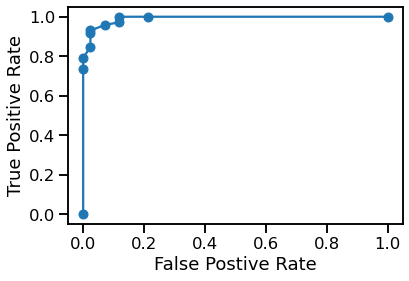

The total number of trees are 10
------------------------------------------------------------------------------------------


adaboost
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('adaboost',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                                          max_features=4,
                                                                          random_state=100)))])

           train      test
accuracy     1.0  0.964912
precision    1.0  0.959459
recall       1.0  0.986111
f1           1.0  0.972603

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114




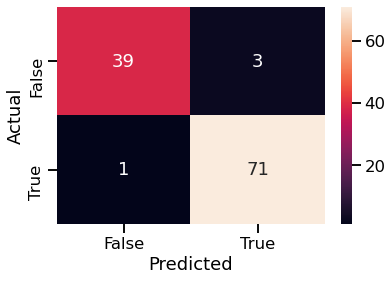

AUC = 0.9666005291005291


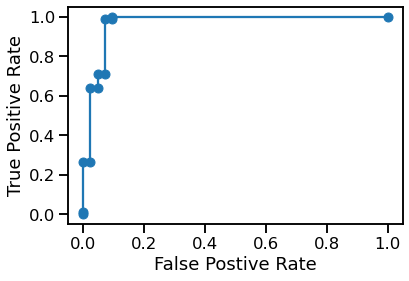

The total number of trees are 50
------------------------------------------------------------------------------------------


gradientboosting
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('gradientboosting',
                 GradientBoostingClassifier(random_state=100))])

           train      test
accuracy     1.0  0.956140
precision    1.0  0.946667
recall       1.0  0.986111
f1           1.0  0.965986

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114




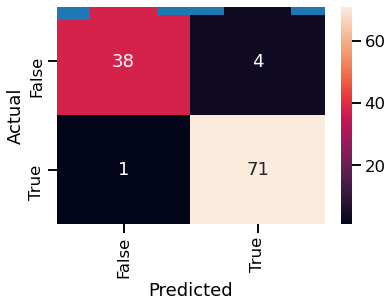

AUC = 0.9907407407407407


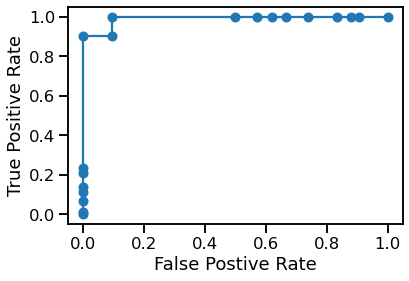

The total number of trees are 100
------------------------------------------------------------------------------------------


randomforest
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('randomforest', RandomForestClassifier(random_state=100))])

           train      test
accuracy     1.0  0.947368
precision    1.0  0.958333
recall       1.0  0.958333
f1           1.0  0.958333

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114




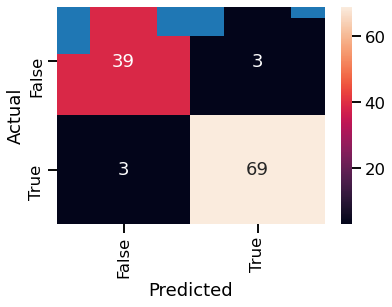

AUC = 0.9925595238095238


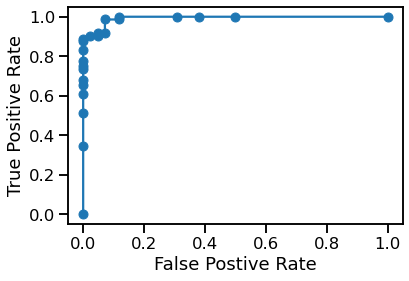

The total number of trees are 100
------------------------------------------------------------------------------------------




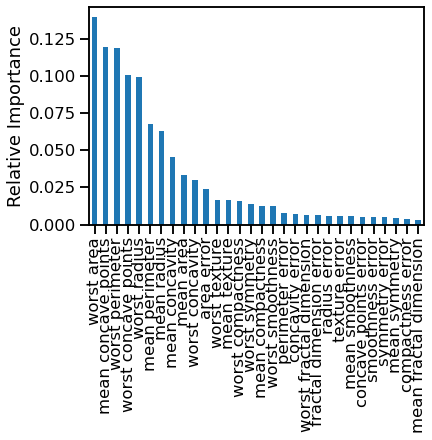

In [154]:
score_summary = []

for i, j in estimators:
    print(i)
    j.fit(x_train, y_train)
    full_results(i,j)

# Stacking

StackingClassifier(cv=5,
                   estimators=[('logisticregression',
                                Pipeline(steps=[('scaler', MinMaxScaler()),
                                                ('logisticregression',
                                                 LogisticRegression(max_iter=5000,
                                                                    random_state=100))])),
                               ('svm',
                                Pipeline(steps=[('scaler', MinMaxScaler()),
                                                ('svm',
                                                 SVC(probability=True,
                                                     random_state=100))])),
                               ('kneighbors',
                                Pipeline(steps=[('scaler', MinMaxScaler()),
                                                ('kneighbors',
                                                 KNei...
                                        

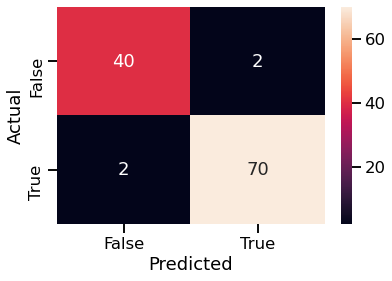

AUC = 0.9970238095238095


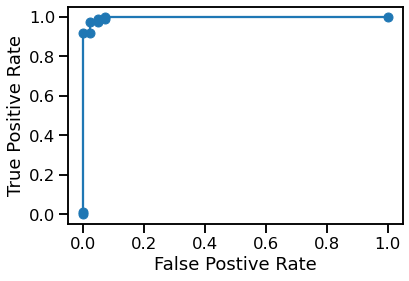

------------------------------------------------------------------------------------------




In [155]:
stacking = StackingClassifier(cv = 5, estimators=estimators, final_estimator=LogisticRegression())
stacking = stacking.fit(x_train, y_train)
full_results('stacking', stacking)

# Voting (Soft)

VotingClassifier(estimators=[('logisticregression',
                              Pipeline(steps=[('scaler', MinMaxScaler()),
                                              ('logisticregression',
                                               LogisticRegression(max_iter=5000,
                                                                  random_state=100))])),
                             ('svm',
                              Pipeline(steps=[('scaler', MinMaxScaler()),
                                              ('svm',
                                               SVC(probability=True,
                                                   random_state=100))])),
                             ('kneighbors',
                              Pipeline(steps=[('scaler', MinMaxScaler()),
                                              ('kneighbors',
                                               KNeighborsC...
                                               AdaBoostClassifier(base_estimator=Decis

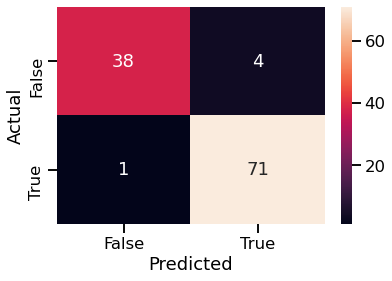

AUC = 0.9950396825396826


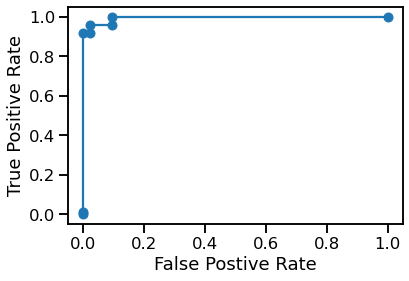

------------------------------------------------------------------------------------------




In [156]:
voting_soft = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
voting_soft = voting_soft.fit(x_train, y_train)
full_results('voting_soft', voting_soft)

# Voting (Hard)

VotingClassifier(estimators=[('logisticregression',
                              Pipeline(steps=[('scaler', MinMaxScaler()),
                                              ('logisticregression',
                                               LogisticRegression(max_iter=5000,
                                                                  random_state=100))])),
                             ('svm',
                              Pipeline(steps=[('scaler', MinMaxScaler()),
                                              ('svm',
                                               SVC(probability=True,
                                                   random_state=100))])),
                             ('kneighbors',
                              Pipeline(steps=[('scaler', MinMaxScaler()),
                                              ('kneighbors',
                                               KNeighborsC...
                                               AdaBoostClassifier(base_estimator=Decis

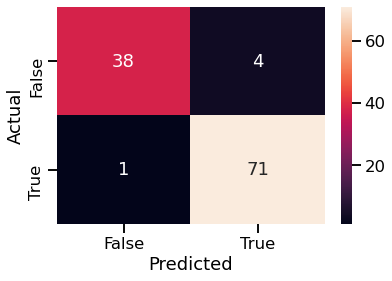

------------------------------------------------------------------------------------------




In [157]:
voting_hard = VotingClassifier(estimators=estimators, voting='hard', n_jobs=-1)
voting_hard = voting_hard.fit(x_train, y_train)
full_results('voting_hard', voting_hard)

# Summary

In [158]:
score_summary_df = pd.Series(dtype='float')

for i in score_summary:
    score_summary_df = pd.concat([score_summary_df, i], axis = 1)

score_summary_df.T.drop([0])

,accuracy,precision,recall,f1
logisticregression,0.956140,0.946667,0.986111,0.965986
svm,0.982456,0.986111,0.986111,0.986111
kneighbors,0.982456,0.972973,1.000000,0.986301
decisiontree,0.929825,0.957143,0.930556,0.943662
bagging,0.947368,0.985294,0.930556,0.957143
adaboost,0.964912,0.959459,0.986111,0.972603
gradientboosting,0.956140,0.946667,0.986111,0.965986
randomforest,0.947368,0.958333,0.958333,0.958333
stacking,0.964912,0.972222,0.972222,0.972222
voting_soft,0.956140,0.946667,0.986111,0.965986


In [159]:
predict_summary_df

logisticregression                         svm                    \
             Prob(y=0) Prob(y=1) Predict Prob(y=0) Prob(y=1) Predict   
0               0.9984    0.0016       0    0.9996    0.0004       0   
1               0.0057    0.9943       1    0.0000    1.0000       1   
2               0.8412    0.1588       0    0.9959    0.0041       0   
3               0.4045    0.5955       1    0.4754    0.5246       1   
4               0.9987    0.0013       0    0.9992    0.0008       0   
..                 ...       ...     ...       ...       ...     ...   
109             0.9908    0.0092       0    0.9999    0.0001       0   
110             0.4498    0.5502       1    0.1654    0.8346       1   
111             0.9605    0.0395       0    0.9953    0.0047       0   
112             0.1843    0.8157       1    0.0523    0.9477       1   
113             0.0746    0.9254       1    0.0038    0.9962       1   

    kneighbors                   decisiontree  ... randomforest            \
     Prob(y=0) Prob(y=1) Predict    Prob(y=0)  ...    Prob(y=0) Prob(y=1)   
0          1.0       0.0       0          1.0  ...         1.00      0.00   
1          0.0       1.0       1          0.0  ...         0.00      1.00   
2          1.0       0.0       0          1.0  ...         0.83      0.17   
3          0.4       0.6       1          0.0  ...         0.73      0.27   
4          1.0       0.0       0          1.0  ...         1.00      0.00   
..         ...       ...     ...          ...  ...          ...       ...   
109        1.0       0.0       0          1.0  ...         1.00      0.00   
110        0.2       0.8       1          1.0  ...         0.46      0.54   
111        1.0       0.0       0          1.0  ...         0.98      0.02   
112        0.2       0.8       1          0.0  ...         0.11      0.89   
113        0.0       1.0       1          0.0  ...         0.00      1.00   

             stacking                   voting_soft                    \
    Predict Prob(y=0) Prob(y=1) Predict   Prob(y=0) Prob(y=1) Predict   
0         0    0.9915    0.0085       0      0.9618    0.0382       0   
1         1    0.0114    0.9886       1      0.0462    0.9538       1   
2         0    0.9870    0.0130       0      0.9086    0.0914       0   
3         0    0.5093    0.4907       0      0.5242    0.4758       0   
4         0    0.9916    0.0084       0      0.9574    0.0426       0   
..      ...       ...       ...     ...         ...       ...     ...   
109       0    0.9915    0.0085       0      0.9571    0.0429       0   
110       1    0.2375    0.7625       1      0.4308    0.5692       1   
111       0    0.9907    0.0093       0      0.9440    0.0560       0   
112       1    0.0300    0.9700       1      0.1248    0.8752       1   
113       1    0.0138    0.9862       1      0.0554    0.9446       1   

    voting_hard  
        Predict  
0             0  
1             1  
2             0  
3             1  
4             0  
..          ...  
109           0  
110           1  
111           0  
112           1  
113           1  

[114 rows x 31 columns]

In [160]:
df5 = predict_summary_df.loc[:,[('stacking','Predict'), ('voting_soft','Predict'), ('voting_hard','Predict')]]
df5

,stacking,voting_soft,voting_hard
,Predict,Predict,Predict
0,0,0,0
1,1,1,1
2,0,0,0
3,0,0,1
4,0,0,0
...,...,...,...
109,0,0,0
110,1,1,1
111,0,0,0


In [161]:
df5['Compare', 'Predict'] = 'Same'

for i,j in df5.iterrows():
    if j[0] == j[1] == j[2]:
        pass
    else:
        df5['Compare', 'Predict'] == 'Different'
        
df5

,stacking,voting_soft,voting_hard,Compare
,Predict,Predict,Predict,Predict
0,0,0,0,Same
1,1,1,1,Same
2,0,0,0,Same
3,0,0,1,Same
4,0,0,0,Same
...,...,...,...,...
109,0,0,0,Same
110,1,1,1,Same
111,0,0,0,Same


# METHOD 2: GRIDSEARCH ON BASE CLASSIFIERS + STACKING / VOTING

In [162]:
score_summary2 = []

In [163]:
#FOR GRID SEARCH 

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

def full_results2(name, classifier):
    y_train_pred = classifier.predict(x_train)
    y_test_pred = classifier.predict(x_test)
    
    try:
        #Type of classifier
        print(classifier.estimator)
        print()

        #GridSearchcv Best Params
        print('best_params_:')
        print(classifier.best_params_)
        print()
    except:
        pass
    
    
    #Train and test set error comparison
    score_summary2.append(measure_error(y_test, y_test_pred, name))
    
    
    train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                       measure_error(y_test, y_test_pred, 'test')],
                                       axis=1)
    print(train_test_full_error)
    print()

    #Classification Report
    print(classification_report(y_test, y_test_pred))
    print()

    #Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    sns.set_context('talk')
    ax = sns.heatmap(cm, annot=True, fmt='d')
    labels = ['False', 'True']
    ax.set_xticklabels(labels);
    ax.set_yticklabels(labels);
    ax.set_ylabel('Actual');
    ax.set_xlabel('Predicted');
    plt.show()
    
    #AUC
    try:
        y_probs = classifier.predict_proba(x_test)[:, 1] 
        print('AUC =', roc_auc_score(y_test, y_probs))
        fpr, tpr, threshold = roc_curve(y_test, y_probs)
        plt.plot(fpr,tpr,'o-')
        plt.xlabel('False Postive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()
    except:
        pass
    
    #Feature importance
    try:
        feature_imp = pd.Series(classifier.best_estimator_._final_estimator.feature_importances_, index=data.feature_names).sort_values(ascending=False)
        fig = plt.figure()
        ax = feature_imp.plot(kind='bar')
        ax.set(ylabel='Relative Importance');
    except:
        pass
    
    #Trees
    try:
        print('The total number of trees are', len(classifier.best_estimator_._final_estimator.estimators_))
        max = 0
        for tree_in_forest in classifier.best_estimator_._final_estimator.estimators_:
            if max < 4:
                plot_tree(tree_in_forest, filled=True)
                plt.show()
                max += 1
    except:
        pass

## LogisticRegression

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'com...ror', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23'))])),
                ('logisticregression',
                 LogisticRegression(max_iter=5000, random_state=100))])

best_params

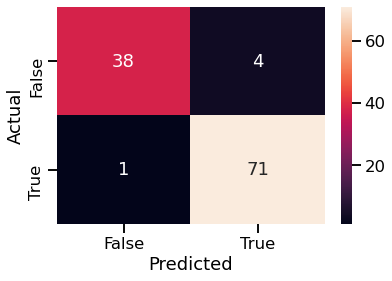

AUC = 0.9953703703703703


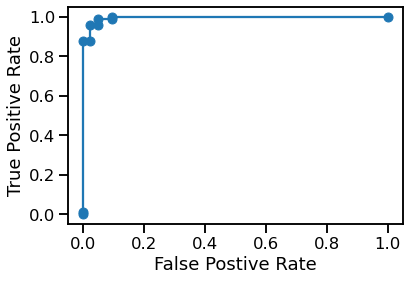

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__penalty,param_logisticregression__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.038098,8.703308e-03,0.004388,4.883249e-04,1,l2,saga,"{'logisticregression__C': 1, 'logisticregressi...",0.945055,1.000000,0.956044,0.978022,0.978022,0.971429,0.019160,1
5,0.020545,4.259605e-03,0.004588,7.977248e-04,1,l2,newton-cg,"{'logisticregression__C': 1, 'logisticregressi...",0.945055,1.000000,0.956044,0.978022,0.978022,0.971429,0.019160,1
6,0.023936,9.249006e-03,0.004987,1.092623e-03,1,l2,lbfgs,"{'logisticregression__C': 1, 'logisticregressi...",0.945055,1.000000,0.956044,0.978022,0.978022,0.971429,0.019160,1
8,0.016755,1.828376e-03,0.004388,4.883442e-04,1,l2,sag,"{'logisticregression__C': 1, 'logisticregressi...",0.945055,1.000000,0.956044,0.978022,0.978022,0.971429,0.019160,1
4,0.343481,6.458106e-02,0.005186,1.933989e-03,1,l1,saga,"{'logisticregression__C': 1, 'logisticregressi...",0.945055,0.967033,0.956044,1.000000,0.978022,0.969231,0.018906,5
2,0.029321,1.687290e-02,0.006184,2.917485e-03,1,l1,liblinear,"{'logisticregression__C': 1, 'logisticregressi...",0.945055,0.978022,0.956044,0.989011,0.967033,0.967033,0.015541,6
19,0.812433,1.752248e-01,0.003397,1.008394e-03,1,none,saga,"{'logisticregression__C': 1, 'logisticregressi...",0.956044,0.956044,0.956044,1.000000,0.956044,0.964835,0.017582,7
24,0.186900,2.897846e-02,0.003989,6.306757e-04,0.5,l1,saga,"{'logisticregression__C': 0.5, 'logisticregres...",0.934066,0.989011,0.956044,0.978022,0.967033,0.964835,0.018906,7
39,0.942877,8.408062e-02,0.002992,6.307510e-04,0.5,none,saga,"{'logisticregression__C': 0.5, 'logisticregres...",0.956044,0.956044,0.956044,1.000000,0.956044,0.964835,0.017582,7
22,0.011569,1.016700e-03,0.005385,2.326369e-03,0.5,l1,liblinear,"{'logisticregression__C': 0.5, 'logisticregres...",0.934066,1.000000,0.956044,0.967033,0.956044,0.962637,0.021534,10


In [164]:
basic_model = LogisticRegression(max_iter=5000, random_state=100)
ct = make_column_transformer((MinMaxScaler(), cols_to_scale))
pipe_model = make_pipeline(ct, basic_model)
pipe_model.fit(x_train, y_train)

pipe_params = {}
pipe_params['logisticregression__penalty'] = ['l1', 'l2', 'elasticnet', 'none']
pipe_params['logisticregression__C'] = [1, 0.5]
pipe_params['logisticregression__solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

grid_params_logisticregression = GridSearchCV(pipe_model, pipe_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_params_logisticregression.fit(x_train, y_train)

#Results
full_results2('logisticregression', grid_params_logisticregression)
gridsearch_df = pd.DataFrame(grid_params_logisticregression.cv_results_)
gridsearch_df.sort_values('rank_test_score')

## SVM

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23'))])),
                ('svc', SVC(probability=True, random_state=100))])

best_params_:
{'svc__C': 0.5, 'svc__degree': 2,

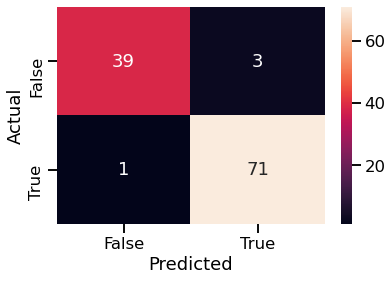

AUC = 0.996031746031746


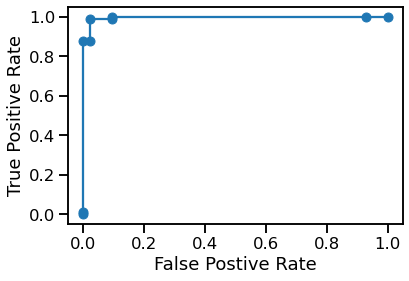

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__degree,param_svc__gamma,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.017952,0.002676,0.004787,3.987790e-04,0.5,2,0.01,linear,"{'svc__C': 0.5, 'svc__degree': 2, 'svc__gamma'...",0.967033,1.000000,0.956044,0.989011,0.978022,0.978022,0.015541,1
10,0.014958,0.001268,0.003990,6.309023e-04,0.5,2,0.7,linear,"{'svc__C': 0.5, 'svc__degree': 2, 'svc__gamma'...",0.967033,1.000000,0.956044,0.989011,0.978022,0.978022,0.015541,1
12,0.016157,0.000399,0.003989,3.234067e-07,0.5,3,0.01,linear,"{'svc__C': 0.5, 'svc__degree': 3, 'svc__gamma'...",0.967033,1.000000,0.956044,0.989011,0.978022,0.978022,0.015541,1
14,0.013176,0.002470,0.003790,9.779149e-04,0.5,3,0.7,linear,"{'svc__C': 0.5, 'svc__degree': 3, 'svc__gamma'...",0.967033,1.000000,0.956044,0.989011,0.978022,0.978022,0.015541,1
0,0.015557,0.000488,0.004788,7.464693e-04,1,2,0.01,linear,"{'svc__C': 1, 'svc__degree': 2, 'svc__gamma': ...",0.956044,1.000000,0.956044,0.978022,0.989011,0.975824,0.017582,5
2,0.016555,0.001739,0.006183,2.033812e-03,1,2,0.7,linear,"{'svc__C': 1, 'svc__degree': 2, 'svc__gamma': ...",0.956044,1.000000,0.956044,0.978022,0.989011,0.975824,0.017582,5
3,0.021342,0.001739,0.004987,6.314297e-04,1,2,0.7,rbf,"{'svc__C': 1, 'svc__degree': 2, 'svc__gamma': ...",0.956044,1.000000,0.956044,0.978022,0.989011,0.975824,0.017582,5
4,0.016356,0.001018,0.004588,4.887918e-04,1,3,0.01,linear,"{'svc__C': 1, 'svc__degree': 3, 'svc__gamma': ...",0.956044,1.000000,0.956044,0.978022,0.989011,0.975824,0.017582,5
6,0.015957,0.000893,0.004787,1.163603e-03,1,3,0.7,linear,"{'svc__C': 1, 'svc__degree': 3, 'svc__gamma': ...",0.956044,1.000000,0.956044,0.978022,0.989011,0.975824,0.017582,5
7,0.019348,0.000798,0.004588,7.979279e-04,1,3,0.7,rbf,"{'svc__C': 1, 'svc__degree': 3, 'svc__gamma': ...",0.956044,1.000000,0.956044,0.978022,0.989011,0.975824,0.017582,5


In [165]:
basic_model = svm.SVC(probability=True, random_state=100)
ct = make_column_transformer((MinMaxScaler(), cols_to_scale))
pipe_model = make_pipeline(ct, basic_model)
pipe_model.fit(x_train, y_train)

pipe_params = {}
pipe_params['svc__kernel'] = ['linear', 'rbf']
pipe_params['svc__C'] = [1, 0.5]
pipe_params['svc__gamma'] = [0.01, 0.7]
pipe_params['svc__degree'] = [2, 3]

grid_params_svm = GridSearchCV(pipe_model, pipe_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_params_svm.fit(x_train, y_train)

#Results
full_results2('svm',grid_params_svm)
gridsearch_df = pd.DataFrame(grid_params_svm.cv_results_)
gridsearch_df.sort_values('rank_test_score')

## KNeighborsClassifier

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23'))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

best_params_:
{'kneighborsclassifier__n_neighbo

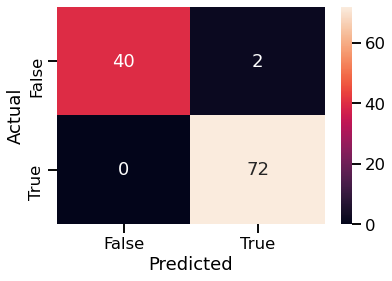

AUC = 0.9927248677248677


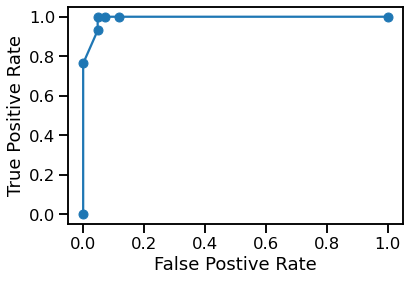

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.009973,5.917394e-07,0.011769,0.000747,5,{'kneighborsclassifier__n_neighbors': 5},0.956044,0.989011,0.956044,0.989011,0.967033,0.971429,0.014906,1
8,0.011569,1.620722e-03,0.011370,0.001352,9,{'kneighborsclassifier__n_neighbors': 9},0.956044,1.000000,0.956044,0.967033,0.978022,0.971429,0.016447,1
2,0.012965,2.092328e-03,0.011170,0.000977,3,{'kneighborsclassifier__n_neighbors': 3},0.945055,0.989011,0.934066,0.989011,0.989011,0.969231,0.024474,3
3,0.009773,3.989935e-04,0.012168,0.001934,4,{'kneighborsclassifier__n_neighbors': 4},0.956044,0.989011,0.934066,0.989011,0.978022,0.969231,0.021308,3
6,0.014760,5.997109e-03,0.015359,0.002721,7,{'kneighborsclassifier__n_neighbors': 7},0.956044,0.989011,0.945055,0.978022,0.978022,0.969231,0.016150,3
7,0.016555,4.575672e-03,0.013963,0.002092,8,{'kneighborsclassifier__n_neighbors': 8},0.956044,0.989011,0.945055,0.989011,0.967033,0.969231,0.017582,3
5,0.009774,3.994235e-04,0.011968,0.001262,6,{'kneighborsclassifier__n_neighbors': 6},0.956044,0.989011,0.934066,0.989011,0.967033,0.967033,0.020850,7
1,0.010372,1.620963e-03,0.011777,0.000743,2,{'kneighborsclassifier__n_neighbors': 2},0.934066,0.945055,0.923077,1.000000,0.978022,0.956044,0.028656,8
0,0.009774,3.987790e-04,0.010371,0.000489,1,{'kneighborsclassifier__n_neighbors': 1},0.912088,0.945055,0.912088,0.989011,0.956044,0.942857,0.028991,9


In [166]:
basic_model = KNeighborsClassifier()
ct = make_column_transformer((MinMaxScaler(), cols_to_scale))
pipe_model = make_pipeline(ct, basic_model)
pipe_model.fit(x_train, y_train)

pipe_params = {}
pipe_params['kneighborsclassifier__n_neighbors'] = range(1,10,1)

grid_params_kneighbors = GridSearchCV(pipe_model, pipe_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_params_kneighbors.fit(x_train, y_train)

#Results
full_results2('kneighbors',grid_params_kneighbors)
gridsearch_df = pd.DataFrame(grid_params_kneighbors.cv_results_)
gridsearch_df.sort_values('rank_test_score')

## DecisionTreeClassifier

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'com...or',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23'))])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                   

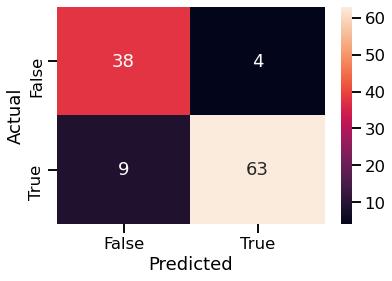

AUC = 0.9047619047619049


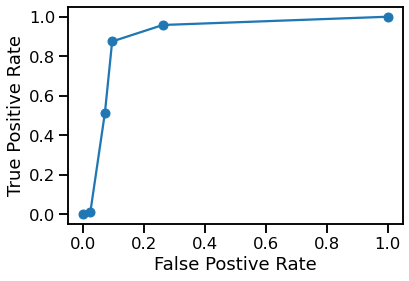

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__max_depth,param_decisiontreeclassifier__max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
92,0.010173,0.000398,0.004388,0.000489,4,3,"{'decisiontreeclassifier__max_depth': 4, 'deci...",0.945055,0.956044,0.945055,0.978022,0.956044,0.956044,0.012038,1
111,0.014561,0.001621,0.004588,0.000489,4,22,"{'decisiontreeclassifier__max_depth': 4, 'deci...",0.945055,0.945055,0.901099,0.945055,0.989011,0.945055,0.027800,2
46,0.010569,0.000491,0.005187,0.000399,2,17,"{'decisiontreeclassifier__max_depth': 2, 'deci...",0.978022,0.945055,0.901099,0.934066,0.945055,0.940659,0.024670,3
77,0.014963,0.002271,0.004784,0.000744,3,18,"{'decisiontreeclassifier__max_depth': 3, 'deci...",0.945055,0.956044,0.923077,0.934066,0.945055,0.940659,0.011207,3
107,0.013563,0.002239,0.004388,0.000798,4,18,"{'decisiontreeclassifier__max_depth': 4, 'deci...",0.912088,0.956044,0.901099,0.945055,0.989011,0.940659,0.031544,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,0.016157,0.008013,0.006185,0.002709,2,1,"{'decisiontreeclassifier__max_depth': 2, 'deci...",0.758242,0.813187,0.791209,0.813187,0.659341,0.767033,0.057480,116
60,0.011370,0.002720,0.006781,0.004107,3,1,"{'decisiontreeclassifier__max_depth': 3, 'deci...",0.659341,0.780220,0.714286,0.736264,0.791209,0.736264,0.047647,117
2,0.009374,0.000489,0.004190,0.000399,1,3,"{'decisiontreeclassifier__max_depth': 1, 'deci...",0.692308,0.637363,0.637363,0.780220,0.670330,0.683516,0.052656,118
1,0.008377,0.001201,0.004186,0.000400,1,2,"{'decisiontreeclassifier__max_depth': 1, 'deci...",0.692308,0.637363,0.637363,0.780220,0.670330,0.683516,0.052656,118


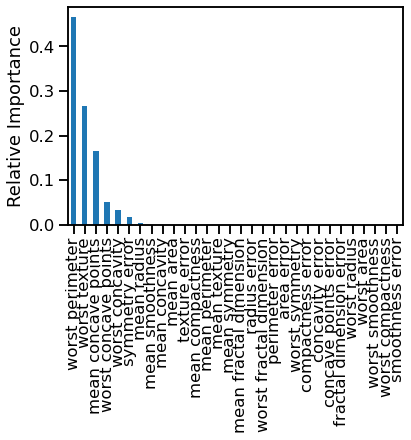

In [167]:
basic_model = DecisionTreeClassifier(class_weight='balanced', random_state=100)
ct = make_column_transformer((MinMaxScaler(), cols_to_scale))
pipe_model = make_pipeline(ct, basic_model)
pipe_model.fit(x_train, y_train)

pipe_params = {}
pipe_params['decisiontreeclassifier__max_depth'] = range(1, 5, 1)
pipe_params['decisiontreeclassifier__max_features'] = range(1, len(data.feature_names)+1)

grid_params_decisiontree = GridSearchCV(pipe_model, pipe_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_params_decisiontree.fit(x_train, y_train)

#Results
full_results2('decisiontree', grid_params_decisiontree)
gridsearch_df = pd.DataFrame(grid_params_decisiontree.cv_results_)
gridsearch_df.sort_values('rank_test_score')

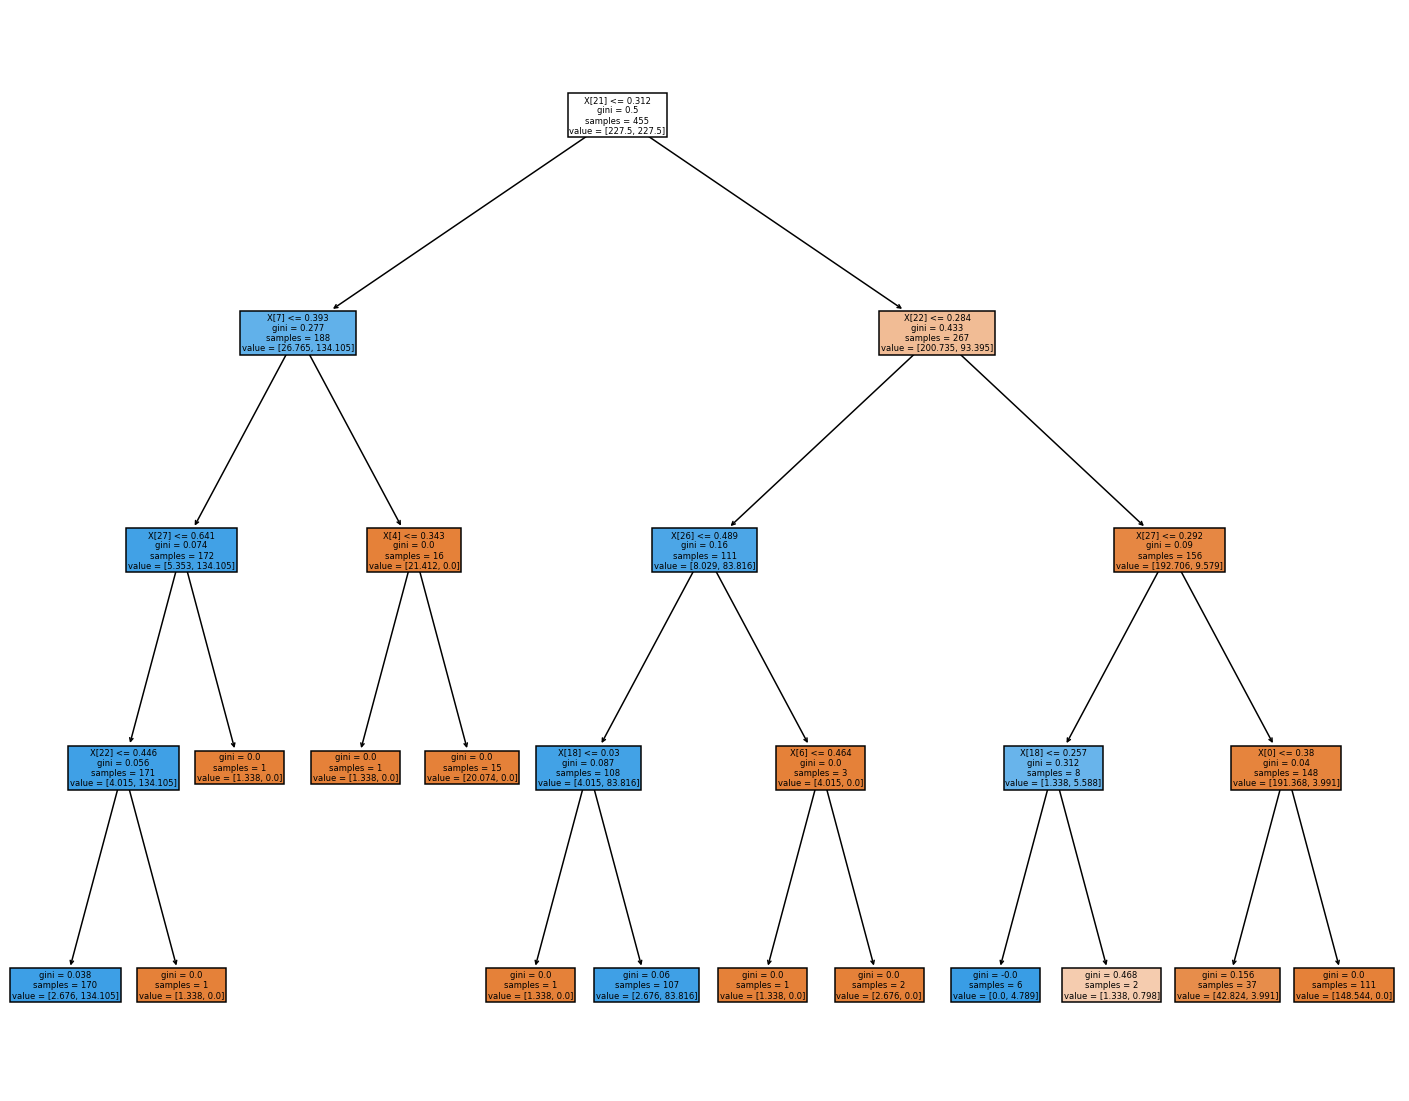

In [168]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,20))
plot_tree(grid_params_decisiontree.best_estimator_._final_estimator, filled=True)
# plot_tree(dt_clf, feature_names=iris.feature_names, class_names=iris.target_names,filled=True)  #show target name
plt.show()

## BaggingClassifier

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23'))])),
                ('baggingclassifier', BaggingClassifier(random_state=100))])

best_params_:
{'baggingclassifier__ma

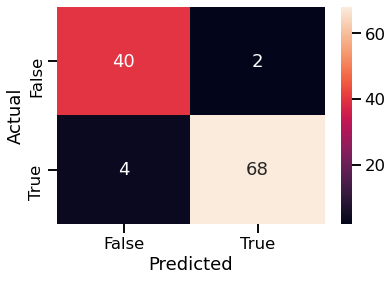

AUC = 0.9917328042328042


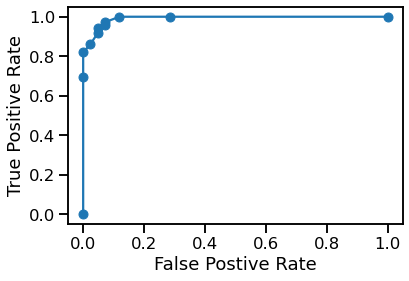

The total number of trees are 10


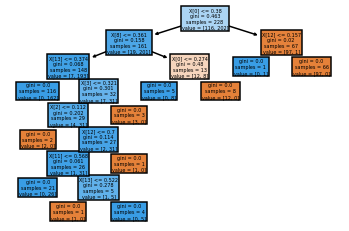

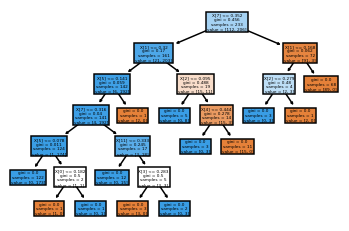

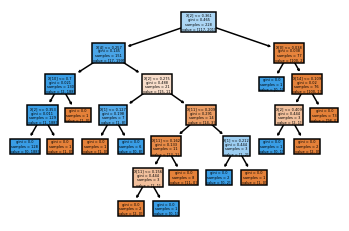

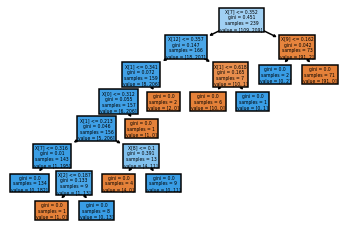

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_baggingclassifier__max_features,param_baggingclassifier__max_samples,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,0.045877,0.001410,0.005984,3.504023e-07,0.5,0.7,"{'baggingclassifier__max_features': 0.5, 'bagg...",0.956044,1.000000,0.934066,0.945055,0.967033,0.960440,0.022628,1
22,0.053457,0.004069,0.007181,1.163244e-03,0.9,0.5,"{'baggingclassifier__max_features': 0.9, 'bagg...",0.945055,0.978022,0.934066,0.967033,0.956044,0.956044,0.015541,2
18,0.052859,0.004370,0.006782,9.771748e-04,0.7,0.7,"{'baggingclassifier__max_features': 0.7, 'bagg...",0.956044,0.989011,0.923077,0.956044,0.945055,0.953846,0.021308,3
19,0.058643,0.003420,0.007779,7.461745e-04,0.7,0.9,"{'baggingclassifier__max_features': 0.7, 'bagg...",0.945055,0.978022,0.912088,0.945055,0.978022,0.951648,0.024670,4
23,0.060039,0.003534,0.007181,9.769022e-04,0.9,0.7,"{'baggingclassifier__max_features': 0.9, 'bagg...",0.978022,0.978022,0.901099,0.956044,0.945055,0.951648,0.028317,4
11,0.039295,0.004911,0.007181,9.768633e-04,0.5,0.3,"{'baggingclassifier__max_features': 0.5, 'bagg...",0.967033,0.978022,0.912088,0.934066,0.967033,0.951648,0.024670,4
8,0.052260,0.008500,0.006782,7.470158e-04,0.3,0.7,"{'baggingclassifier__max_features': 0.3, 'bagg...",0.945055,0.978022,0.934066,0.945055,0.945055,0.949451,0.014906,7
12,0.046077,0.005584,0.005984,6.318073e-04,0.5,0.5,"{'baggingclassifier__max_features': 0.5, 'bagg...",0.945055,0.989011,0.901099,0.934066,0.967033,0.947253,0.029812,8
17,0.047074,0.004522,0.006981,6.307511e-04,0.7,0.5,"{'baggingclassifier__max_features': 0.7, 'bagg...",0.967033,0.978022,0.901099,0.923077,0.967033,0.947253,0.029812,8
6,0.042286,0.004442,0.008179,3.116117e-03,0.3,0.3,"{'baggingclassifier__max_features': 0.3, 'bagg...",0.945055,0.967033,0.923077,0.945055,0.945055,0.945055,0.013900,10


In [169]:
basic_model = BaggingClassifier(random_state=100)
ct = make_column_transformer((MinMaxScaler(), cols_to_scale))
pipe_model = make_pipeline(ct, basic_model)
pipe_model.fit(x_train, y_train)

pipe_params = {}
pipe_params['baggingclassifier__max_samples'] = [0.1,0.3,0.5,0.7,0.9]
pipe_params['baggingclassifier__max_features'] = [0.1,0.3,0.5,0.7,0.9]

grid_params_bagging = GridSearchCV(pipe_model, pipe_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_params_bagging.fit(x_train, y_train)

#Results
full_results2('bagging', grid_params_bagging)
gridsearch_df = pd.DataFrame(grid_params_bagging.cv_results_)
gridsearch_df.sort_values('rank_test_score')

## Adaboost

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'com...
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23'))])),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                                      

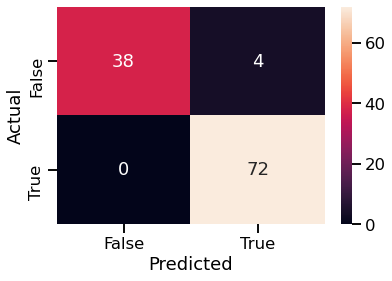

AUC = 0.9871031746031746


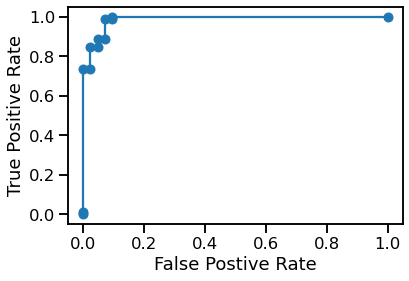

The total number of trees are 300


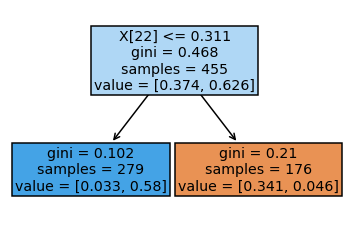

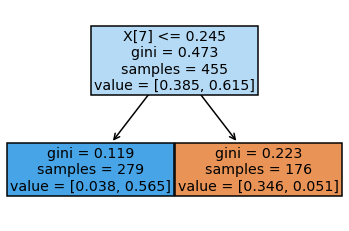

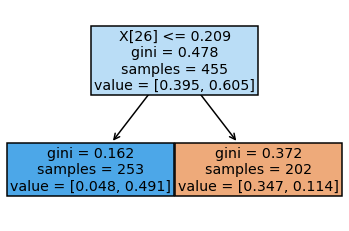

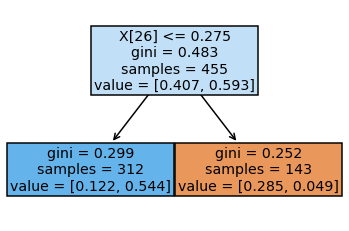

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_adaboostclassifier__learning_rate,param_adaboostclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,0.911362,0.031529,0.091555,0.003753,0.1,350,"{'adaboostclassifier__learning_rate': 0.1, 'ad...",0.967033,0.989011,0.945055,1.000000,1.000000,0.980220,0.021308,1
12,0.747995,0.008788,0.084773,0.006402,0.1,300,"{'adaboostclassifier__learning_rate': 0.1, 'ad...",0.967033,0.989011,0.945055,1.000000,1.000000,0.980220,0.021308,1
11,0.638492,0.018023,0.070012,0.006506,0.1,250,"{'adaboostclassifier__learning_rate': 0.1, 'ad...",0.967033,0.989011,0.923077,1.000000,0.989011,0.973626,0.027451,3
10,0.495673,0.026612,0.057048,0.004522,0.1,200,"{'adaboostclassifier__learning_rate': 0.1, 'ad...",0.967033,0.989011,0.923077,0.989011,0.978022,0.969231,0.024474,4
5,0.755578,0.019692,0.070611,0.000746,0.3,300,"{'adaboostclassifier__learning_rate': 0.3, 'ad...",0.945055,0.967033,0.923077,1.000000,1.000000,0.967033,0.030295,5
6,0.845937,0.035360,0.087765,0.005200,0.3,350,"{'adaboostclassifier__learning_rate': 0.3, 'ad...",0.945055,0.967033,0.923077,1.000000,1.000000,0.967033,0.030295,5
9,0.359838,0.010581,0.040891,0.002524,0.1,150,"{'adaboostclassifier__learning_rate': 0.1, 'ad...",0.967033,0.989011,0.923077,0.989011,0.956044,0.964835,0.024474,7
4,0.656643,0.027816,0.063829,0.003731,0.3,250,"{'adaboostclassifier__learning_rate': 0.3, 'ad...",0.945055,0.967033,0.923077,0.989011,1.000000,0.964835,0.028146,8
7,0.120079,0.002054,0.015558,0.000489,0.1,50,"{'adaboostclassifier__learning_rate': 0.1, 'ad...",0.956044,0.989011,0.923077,0.967033,0.967033,0.960440,0.021534,9
3,0.506445,0.017767,0.058844,0.008369,0.3,200,"{'adaboostclassifier__learning_rate': 0.3, 'ad...",0.945055,0.978022,0.923077,0.978022,0.978022,0.960440,0.022628,10


In [170]:
basic_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, max_features=4, random_state=42), random_state=100)
ct = make_column_transformer((MinMaxScaler(), cols_to_scale))
pipe_model = make_pipeline(ct, basic_model)
pipe_model.fit(x_train, y_train)

pipe_params = {}
pipe_params['adaboostclassifier__n_estimators'] = range(50,400,50)
pipe_params['adaboostclassifier__learning_rate'] = [0.3, 0.1, 0.01]

grid_params_adaboost = GridSearchCV(pipe_model, pipe_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_params_adaboost.fit(x_train, y_train)

#Results
full_results2('adaboost', grid_params_adaboost)
gridsearch_df = pd.DataFrame(grid_params_adaboost.cv_results_)
gridsearch_df.sort_values('rank_test_score')

## GradientBoosting

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'com...r', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23'))])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=100))])

best_params_

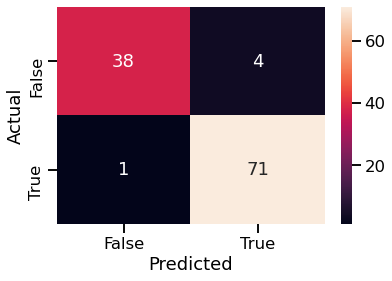

AUC = 0.9907407407407407


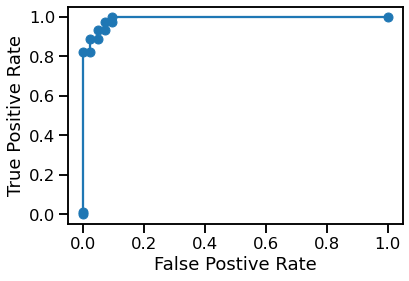

The total number of trees are 100


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__learning_rate,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.094148,0.003764,0.004987,4.422006e-07,0.3,2,log2,{'gradientboostingclassifier__learning_rate': ...,0.978022,0.989011,0.934066,0.989011,0.989011,0.975824,0.021308,1
1,0.071208,0.001353,0.004787,3.989935e-04,0.3,1,sqrt,{'gradientboostingclassifier__learning_rate': ...,0.967033,1.000000,0.934066,0.978022,0.989011,0.973626,0.022628,2
2,0.070611,0.002476,0.004189,3.988505e-04,0.3,1,log2,{'gradientboostingclassifier__learning_rate': ...,0.967033,1.000000,0.934066,0.978022,0.989011,0.973626,0.022628,2
4,0.099932,0.002706,0.004588,4.887924e-04,0.3,2,sqrt,{'gradientboostingclassifier__learning_rate': ...,0.978022,1.000000,0.934066,0.956044,1.000000,0.973626,0.025631,2
38,0.171541,0.002360,0.004588,4.885972e-04,0.1,4,log2,{'gradientboostingclassifier__learning_rate': ...,0.967033,0.989011,0.945055,0.978022,0.989011,0.973626,0.016447,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.787094,0.037346,0.004588,7.977605e-04,0.01,6,auto,{'gradientboostingclassifier__learning_rate': ...,0.934066,0.923077,0.901099,0.912088,0.934066,0.920879,0.012815,77
42,0.703119,0.039953,0.004588,4.886361e-04,0.1,6,auto,{'gradientboostingclassifier__learning_rate': ...,0.912088,0.901099,0.901099,0.923077,0.945055,0.916484,0.016447,78
55,0.104121,0.021783,0.005785,1.323628e-03,0.01,1,sqrt,{'gradientboostingclassifier__learning_rate': ...,0.923077,0.945055,0.857143,0.912088,0.934066,0.914286,0.030612,79
56,0.097141,0.008093,0.005185,9.777111e-04,0.01,1,log2,{'gradientboostingclassifier__learning_rate': ...,0.912088,0.945055,0.857143,0.912088,0.934066,0.912088,0.030295,80


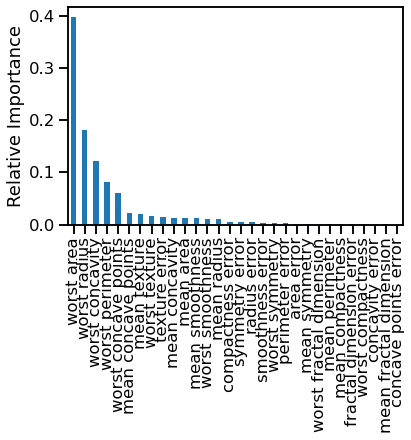

In [171]:
basic_model = GradientBoostingClassifier(random_state=100)
ct = make_column_transformer((MinMaxScaler(), cols_to_scale))
pipe_model = make_pipeline(ct, basic_model)
pipe_model.fit(x_train, y_train)

pipe_params = {}
pipe_params['gradientboostingclassifier__max_depth'] = range(1,10,1)
pipe_params['gradientboostingclassifier__learning_rate'] = [0.3, 0.1, 0.01]
pipe_params['gradientboostingclassifier__max_features'] = ['auto', 'sqrt', 'log2']

grid_params_gradientboosting = GridSearchCV(pipe_model, pipe_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_params_gradientboosting.fit(x_train, y_train)

#Results
full_results2('gradientboosting', grid_params_gradientboosting)
gridsearch_df = pd.DataFrame(grid_params_gradientboosting.cv_results_)
gridsearch_df.sort_values('rank_test_score')

## RandomForestClassifier

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'com...ness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=100))])

best_params

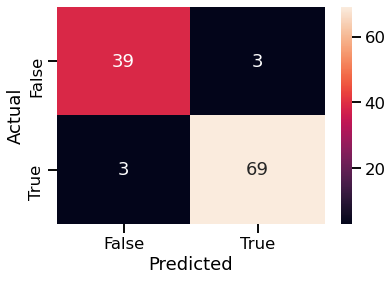

AUC = 0.9920634920634921


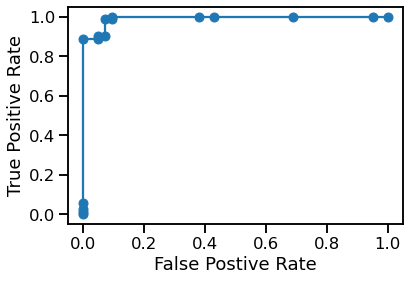

The total number of trees are 100


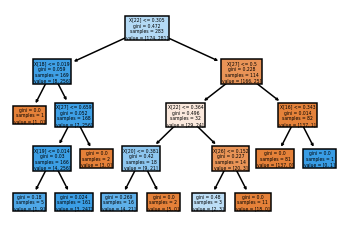

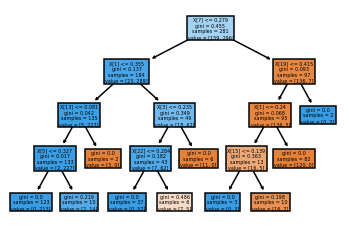

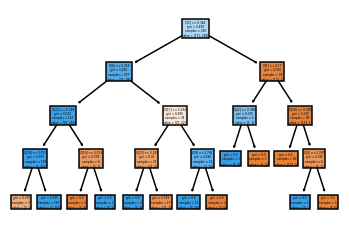

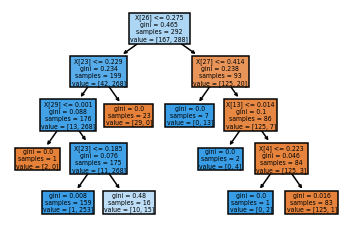

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.269878,0.004117,0.018950,0.000631,4,100,"{'randomforestclassifier__max_depth': 4, 'rand...",0.967033,0.989011,0.923077,0.934066,0.956044,0.953846,0.023466,1
6,0.503944,0.005498,0.033210,0.002665,2,200,"{'randomforestclassifier__max_depth': 2, 'rand...",0.978022,0.978022,0.912088,0.934066,0.956044,0.951648,0.025631,2
8,0.261852,0.002886,0.019548,0.001620,3,100,"{'randomforestclassifier__max_depth': 3, 'rand...",0.967033,0.978022,0.923077,0.934066,0.956044,0.951648,0.020382,2
9,0.387762,0.002706,0.025332,0.000798,3,150,"{'randomforestclassifier__max_depth': 3, 'rand...",0.967033,0.978022,0.923077,0.934066,0.956044,0.951648,0.020382,2
10,0.517216,0.008093,0.034109,0.001323,3,200,"{'randomforestclassifier__max_depth': 3, 'rand...",0.967033,0.978022,0.923077,0.934066,0.956044,0.951648,0.020382,2
11,0.648465,0.010237,0.040891,0.001784,3,250,"{'randomforestclassifier__max_depth': 3, 'rand...",0.967033,0.978022,0.923077,0.934066,0.956044,0.951648,0.020382,2
13,0.419278,0.011487,0.027925,0.003155,4,150,"{'randomforestclassifier__max_depth': 4, 'rand...",0.967033,0.978022,0.923077,0.934066,0.956044,0.951648,0.020382,2
14,0.594409,0.012001,0.031915,0.002185,4,200,"{'randomforestclassifier__max_depth': 4, 'rand...",0.967033,0.978022,0.923077,0.934066,0.956044,0.951648,0.020382,2
15,0.595612,0.067253,0.026936,0.006550,4,250,"{'randomforestclassifier__max_depth': 4, 'rand...",0.967033,0.978022,0.923077,0.934066,0.956044,0.951648,0.020382,2
4,0.238788,0.005890,0.014666,0.003210,2,100,"{'randomforestclassifier__max_depth': 2, 'rand...",0.978022,0.978022,0.901099,0.923077,0.956044,0.947253,0.030612,10


In [172]:
basic_model = RandomForestClassifier(random_state=100)
ct = make_column_transformer((MinMaxScaler(), cols_to_scale))
pipe_model = make_pipeline(ct, basic_model)
pipe_model.fit(x_train, y_train)

pipe_params = {}
pipe_params['randomforestclassifier__max_depth'] = range(1,5,1)
pipe_params['randomforestclassifier__n_estimators'] = range(100,300,50)
#pipe_params['randomforestclassifier__max_features'] = range(1, len(data.feature_names)+1)

grid_params_randomforest = GridSearchCV(pipe_model, pipe_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_params_randomforest.fit(x_train, y_train)

#Results
full_results2('randomforest', grid_params_randomforest)
gridsearch_df = pd.DataFrame(grid_params_randomforest.cv_results_)
gridsearch_df.sort_values('rank_test_score')

# Stacking

              train      test
accuracy   0.991209  0.956140
precision  0.986159  0.958904
recall     1.000000  0.972222
f1         0.993031  0.965517

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114




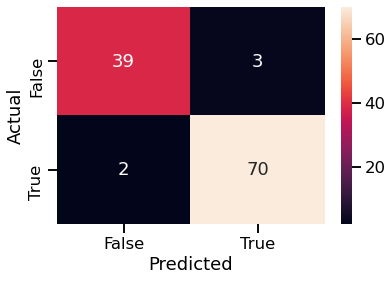

AUC = 0.9947089947089947


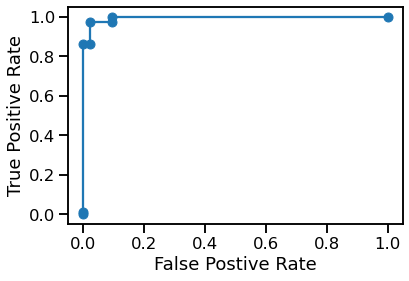

In [174]:
#FOR GRIDSEARCH
estimators = [('logisticregression', grid_params_logisticregression),
              ('svm', grid_params_svm),
              ('kneighbors', grid_params_kneighbors),
              ('decisiontree', grid_params_decisiontree),
              ('bagging', grid_params_bagging),
              ('adaboost', grid_params_adaboost),
              ('gradientboosting', grid_params_gradientboosting),
              ('randomforest', grid_params_randomforest)]
    
stacking = StackingClassifier(cv = 5, estimators=estimators, final_estimator=LogisticRegression())

stacking = stacking.fit(x_train, y_train)

full_results2('stacking', stacking)

# Voting (Soft)

              train      test
accuracy   0.995604  0.947368
precision  0.993031  0.945946
recall     1.000000  0.972222
f1         0.996503  0.958904

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114




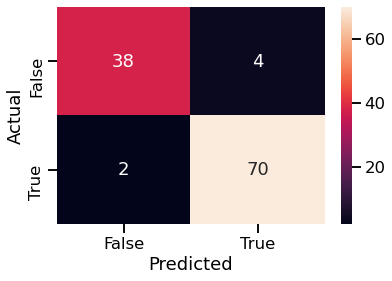

AUC = 0.9930555555555556


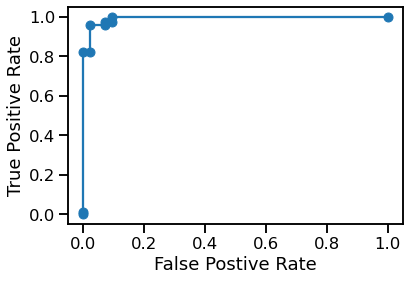

In [176]:
voting_soft = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
voting_soft = voting_soft.fit(x_train, y_train)
full_results2('voting_soft', voting_soft)

# Voting (Hard)

              train      test
accuracy   0.995604  0.956140
precision  0.993031  0.946667
recall     1.000000  0.986111
f1         0.996503  0.965986

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114




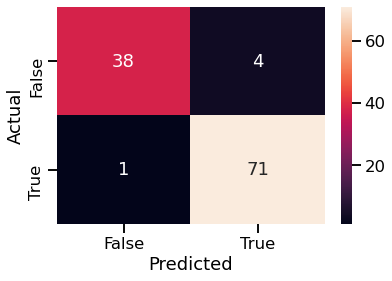

In [177]:
voting_hard = VotingClassifier(estimators=estimators, voting='hard', n_jobs=-1)
voting_hard = voting_hard.fit(x_train, y_train)
full_results2('voting_hard', voting_hard)

# Summary

In [178]:
score_summary_df2 = pd.Series(dtype='float')

for i in score_summary2:
    score_summary_df2 = pd.concat([score_summary_df2, i], axis = 1)

score_summary_df2.T.drop([0])

,accuracy,precision,recall,f1
logisticregression,0.956140,0.946667,0.986111,0.965986
svm,0.964912,0.959459,0.986111,0.972603
kneighbors,0.982456,0.972973,1.000000,0.986301
decisiontree,0.885965,0.940299,0.875000,0.906475
bagging,0.947368,0.971429,0.944444,0.957746
adaboost,0.964912,0.947368,1.000000,0.972973
gradientboosting,0.956140,0.946667,0.986111,0.965986
randomforest,0.947368,0.958333,0.958333,0.958333
stacking,0.956140,0.958904,0.972222,0.965517
voting_soft,0.947368,0.945946,0.972222,0.958904
